In [1]:
import pandas as pd

In [2]:
from google.colab import files

files.upload()

Saving BreastCancer.csv to BreastCancer.csv


{'BreastCancer.csv': b'Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class\n1000025,5,1,1,1,2,1,3,1,1,0\n1002945,5,4,4,5,7,10,3,2,1,0\n1015425,3,1,1,1,2,2,3,1,1,0\n1016277,6,8,8,1,3,4,3,7,1,0\n1017023,4,1,1,3,2,1,3,1,1,0\n1017122,8,10,10,8,7,10,9,7,1,1\n1018099,1,1,1,1,2,10,3,1,1,0\n1018561,2,1,2,1,2,1,3,1,1,0\n1033078,2,1,1,1,2,1,1,1,5,0\n1033078,4,2,1,1,2,1,2,1,1,0\n1035283,1,1,1,1,1,1,3,1,1,0\n1036172,2,1,1,1,2,1,2,1,1,0\n1041801,5,3,3,3,2,3,4,4,1,1\n1043999,1,1,1,1,2,3,3,1,1,0\n1044572,8,7,5,10,7,9,5,5,4,1\n1047630,7,4,6,4,6,1,4,3,1,1\n1048672,4,1,1,1,2,1,2,1,1,0\n1049815,4,1,1,1,2,1,3,1,1,0\n1050670,10,7,7,6,4,10,4,1,2,1\n1050718,6,1,1,1,2,1,3,1,1,0\n1054590,7,3,2,10,5,10,5,4,4,1\n1054593,10,5,5,3,6,7,7,10,1,1\n1056784,3,1,1,1,2,1,2,1,1,0\n1059552,1,1,1,1,2,1,3,1,1,0\n1065726,5,2,3,4,2,7,3,6,1,1\n1066373,3,2,1,1,1,1,2,1,1,0\n1066979,5,1,1,1,2,1,2,

In [3]:
df=pd.read_csv("BreastCancer.csv")

In [ ]:
# vals_ds = tfds.load('mnist', split=[
#     f'train[{k}%:{k+10}%]' for k in range(0, 100, 10)
# ])
# trains_ds = tfds.load('mnist', split=[
#     f'train[:{k}%]+train[{k+10}%:]' for k in range(0, 100, 10)
# ])

In [4]:
from sklearn.naive_bayes import GaussianNB ,BernoulliNB, CategoricalNB , MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import completeness_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix




In [5]:
import numpy as np


In [6]:
df.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0


     Clump Thickness  Uniformity of Cell Size  Uniformity of Cell Shape  \
0                  5                        1                         1   
1                  5                        4                         4   
2                  3                        1                         1   
3                  6                        8                         8   
4                  4                        1                         1   
..               ...                      ...                       ...   
678                3                        1                         1   
679                2                        1                         1   
680                5                       10                        10   
681                4                        8                         6   
682                4                        8                         8   

     Marginal Adhesion  Single Epithelial Cell Size  Bare Nuclei  \
0                    1         

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

0.893237440961786
0.9059351373793787


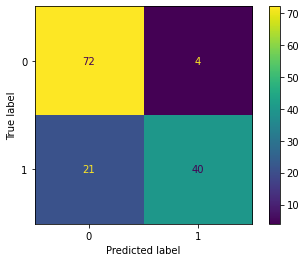

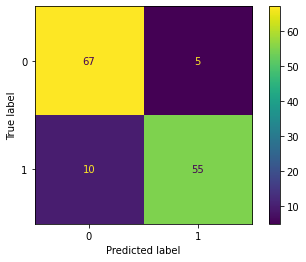

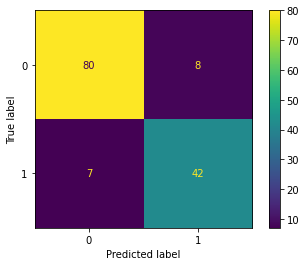

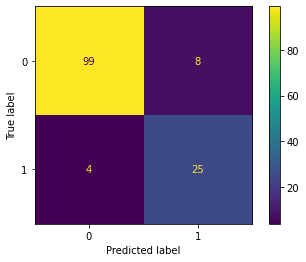

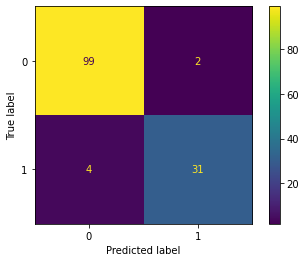

In [7]:
plot_confusion_matrix
kf= KFold(n_splits=5)

acc_train=[]
acc_test=[]
x=df.iloc[:,1:10]
y=df.iloc[:,10]
print(x)
# nb=BernoulliNB()
nb=MultinomialNB()
for train,test in kf.split(x):
    X_train=x.iloc[train]
    # print(X_train)
    y_train=y.iloc[train]
    X_test=x.iloc[test]
    y_test=y.iloc[test]

    nb.fit(X_train,y_train)

    acc_train.append(accuracy_score(y_train,nb.predict(X_train)))
    acc_test.append(accuracy_score(y_test,nb.predict(X_test)))

    plot_confusion_matrix(nb,X_test,y_test)
print(np.mean(acc_test))
print(np.mean(acc_train))




/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMa

0.9605195362816659
0.9637650588290441


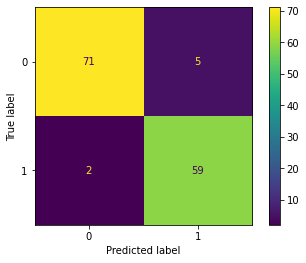

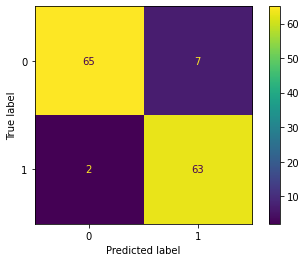

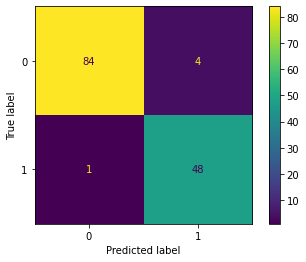

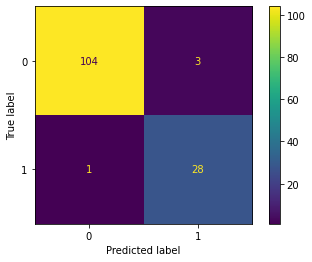

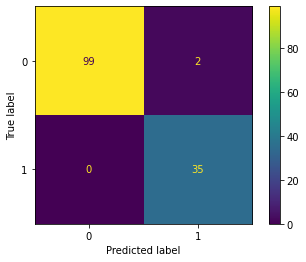

In [9]:
plot_confusion_matrix
kf= KFold(n_splits=5)

acc_train=[]
acc_test=[]
x=df.iloc[:,1:10]
y=df.iloc[:,10]
# print(x)
nb=GaussianNB()
for train,test in kf.split(x):
    X_train=x.iloc[train]
    # print(X_train)
    y_train=y.iloc[train]
    X_test=x.iloc[test]
    y_test=y.iloc[test]

    nb.fit(X_train,y_train)

    acc_train.append(accuracy_score(y_train,nb.predict(X_train)))
    acc_test.append(accuracy_score(y_test,nb.predict(X_test)))

    plot_confusion_matrix(nb,X_test,y_test)
print(np.mean(acc_test))
print(np.mean(acc_train))


